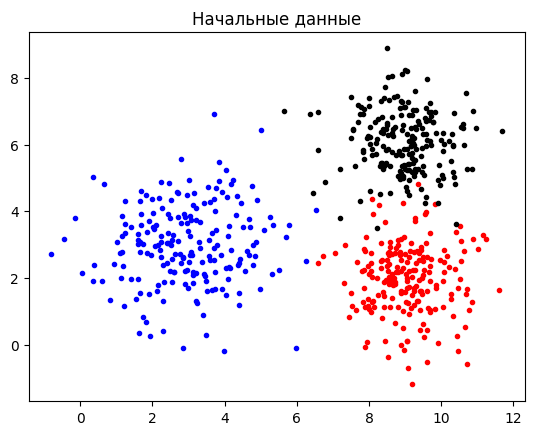

/home/pavel/dev/bigdata/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


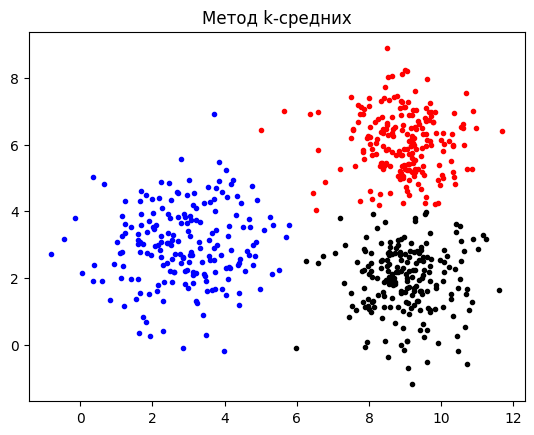

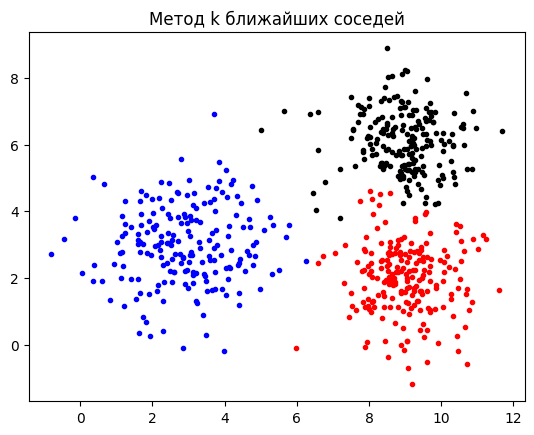

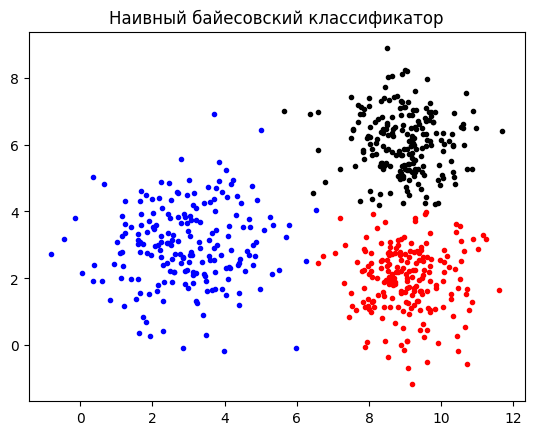

К ближайших соседей score: 0.98000
К ближайших соседей train score: 0.98333
К ближайших соседей test score: 0.96667
Наивный байесовский метод train score: 0.98542
Наивный байесовский метод test score: 0.99167

K-neigh train conf matrix
[[155   1   1]
 [  0 161   3]
 [  0   3 156]]

Gaussian Naive Bayes train conf matrix
[[157   0   0]
 [  0 159   5]
 [  0   2 157]]

K-neigh test conf matrix
[[42  0  1]
 [ 0 36  0]
 [ 0  3 38]]

Gaussian Naive Bayes test conf matrix
[[43  0  0]
 [ 0 36  0]
 [ 0  1 40]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats

from sklearn import cluster
from sklearn import neighbors
from sklearn import naive_bayes

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib as mpl

def generate_data_2d(size : int, center : np.ndarray, covar_diag : np.ndarray):
    cov = np.array([[covar_diag[0], 0], [0, covar_diag[1]]])
    data = np.random.multivariate_normal(mean=center, cov=cov, size=size)
    return data


SIZE = 200
data1 = generate_data_2d(SIZE, np.array([3, 3]), np.array([1.5, 1.5]))
data2 = generate_data_2d(SIZE, np.array([9, 2]), np.array([1, 1]))
data3 = generate_data_2d(SIZE, np.array([9, 6]), np.array([1, 1]))


plt.plot(data1[:,0], data1[:,1], 'bo', markersize=3)
plt.plot(data2[:,0], data2[:,1], 'ro', markersize=3)
plt.plot(data3[:,0], data3[:,1], 'ko', markersize=3)
plt.title("Начальные данные")

plt.show()


n_classes = 3

X = np.concatenate((np.concatenate((data1, data2)), data3))

cluster_model = cluster.KMeans(n_clusters=n_classes)
cluster_model.fit(X)
clust_y = cluster_model.predict(X)

predict = [[] for _ in range(n_classes)]
for xi, yi in zip(X, clust_y):
    predict[yi].append(xi)

preData1 = np.array(predict[0])
preData2 = np.array(predict[1])
preData3 = np.array(predict[2])

plt.plot(preData1[:,0], preData1[:,1], 'ro', markersize=3)
plt.plot(preData2[:,0], preData2[:,1], 'bo', markersize=3)
plt.plot(preData3[:,0], preData3[:,1], 'ko', markersize=3)

plt.title("Метод k-средних")
plt.show()
data=[data1, data2, data3]
preData = [preData1, preData2, preData3]

ress = [0, 0, 0]
for i in range(3):
    for j in range(3):
        ress_ij = 0
        for x in data[i]:
            for y in preData[j]:
                if all(x == y):
                    ress_ij += 1
        ress[i] = max(ress[i], ress_ij)




def split_predicted_data(X, model):
    res = model.predict(X)
    
    i_neight_data1 = np.argwhere(res == 0)
    i_neight_data2 = np.argwhere(res == 1)
    i_neight_data3 = np.argwhere(res == 2)
    
    neight_data1 = X[i_neight_data1[:,0]]
    neight_data2 = X[i_neight_data2[:,0]]
    neight_data3 = X[i_neight_data3[:,0]]
    return neight_data1, neight_data2, neight_data3
X = np.concatenate((data1, data2, data3), axis=0)
y = np.array([0] * SIZE + [1] * SIZE + [2] * SIZE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1./5.), random_state=42)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

neight_data1, neight_data2, neight_data3 = split_predicted_data(X, neigh)

plt.plot(neight_data1[:,0], neight_data1[:,1], 'bo', markersize=3)
plt.plot(neight_data2[:,0], neight_data2[:,1], 'ro', markersize=3)
plt.plot(neight_data3[:,0], neight_data3[:,1], 'ko', markersize=3)
plt.title("Метод k ближайших соседей")

plt.show()

gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_data1, gnb_data2, gnb_data3 = split_predicted_data(X, gnb)

plt.plot(gnb_data1[:,0], gnb_data1[:,1], 'bo', markersize=3)
plt.plot(gnb_data2[:,0], gnb_data2[:,1], 'ro', markersize=3)
plt.plot(gnb_data3[:,0], gnb_data3[:,1], 'ko', markersize=3)
plt.title("Наивный байесовский классификатор")

plt.show()

print("К ближайших соседей score: {:.5f}".format(sum(ress)/600))
print("К ближайших соседей train score: {:.5f}".format(neigh.score(X_train, y_train)))
print("К ближайших соседей test score: {:.5f}".format(neigh.score(X_test, y_test)))
print("Наивный байесовский метод train score: {:.5f}".format(gnb.score(X_train, y_train)))
print("Наивный байесовский метод test score: {:.5f}".format(gnb.score(X_test, y_test)))
print()
cm = []
print("K-neigh train conf matrix")
cm.append(['K-neigh train', confusion_matrix(y_train, neigh.predict(X_train))])
print(confusion_matrix(y_train, neigh.predict(X_train)))
print()
print("Gaussian Naive Bayes train conf matrix")
cm.append(['Gaussian Naive Bayes train', confusion_matrix(y_train, gnb.predict(X_train))])
print(confusion_matrix(y_train, gnb.predict(X_train)))
print()
print("K-neigh test conf matrix")
cm.append(['K-neigh test', confusion_matrix(y_test, neigh.predict(X_test))])
print(confusion_matrix(y_test, neigh.predict(X_test)))
print()
print("Gaussian Naive Bayes test conf matrix")
cm.append(['Gaussian Naive Bayes test', confusion_matrix(y_test, gnb.predict(X_test))])
print(confusion_matrix(y_test, gnb.predict(X_test)))
